<a href="https://colab.research.google.com/github/Madhumita-crypto/campus-energy-optimizer/blob/main/Campus_Energy_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# 🏫 Campus Energy Optimizer – ML Project

## 1. Setup & Imports
## 2. Load Dataset
## 3. Exploratory Data Analysis (EDA)
## 4. Data Preprocessing
## 5. Model Training & Evaluation
## 6. Hyperparameter Tuning (Optional)
## 7. Final Model & Export
## 8. Streamlit Deployment Prep


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [100]:
df = pd.read_csv("campus_energy_dataset.csv")
df.head()


,hour,day_of_week,temperature,humidity,occupancy,building_type,is_holiday,previous_usage,energy_usage
0,6,0,26.658144,71.487584,173,Admin,1,15.293714,57.771260
1,19,1,29.783148,46.768798,259,Lab,1,26.287547,114.515925
2,14,5,35.135045,54.613754,223,Hostel,0,17.990235,103.145609
3,10,6,29.857005,76.614872,222,Lab,0,27.056590,93.267466
4,7,1,28.847140,92.864905,266,Hostel,0,11.801840,74.734819


In [101]:
df.shape


(10000, 9)

In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour            10000 non-null  int64  
 1   day_of_week     10000 non-null  int64  
 2   temperature     10000 non-null  float64
 3   humidity        10000 non-null  float64
 4   occupancy       10000 non-null  int64  
 5   building_type   10000 non-null  object 
 6   is_holiday      10000 non-null  int64  
 7   previous_usage  10000 non-null  float64
 8   energy_usage    10000 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 703.3+ KB


In [103]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
hour,10000.0,11.609800,6.951257,0.000000,6.000000,12.000000,18.000000,23.000000
day_of_week,10000.0,3.006200,2.011459,0.000000,1.000000,3.000000,5.000000,6.000000
temperature,10000.0,28.057395,5.009299,10.000000,24.642378,28.093935,31.477307,45.000000
humidity,10000.0,55.160439,14.774651,20.000000,44.821778,55.072013,65.172209,100.000000
occupancy,10000.0,149.406900,86.396390,0.000000,75.000000,149.000000,225.000000,299.000000
is_holiday,10000.0,0.150000,0.357089,0.000000,0.000000,0.000000,0.000000,1.000000
previous_usage,10000.0,17.549998,5.775200,1.741213,13.281184,16.673640,21.561337,34.830943
energy_usage,10000.0,77.000007,22.917755,6.972272,60.390802,76.895589,93.072908,153.736190


In [104]:
df.isnull().sum()


,0
hour,0
day_of_week,0
temperature,0
humidity,0
occupancy,0
building_type,0
is_holiday,0
previous_usage,0
energy_usage,0


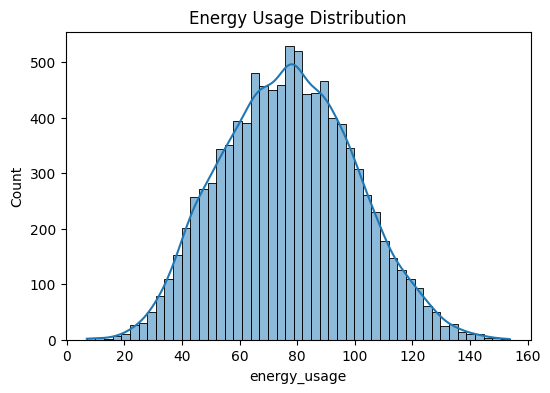

In [105]:
#Energy Usage Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['energy_usage'], kde=True)
plt.title("Energy Usage Distribution")
plt.show()


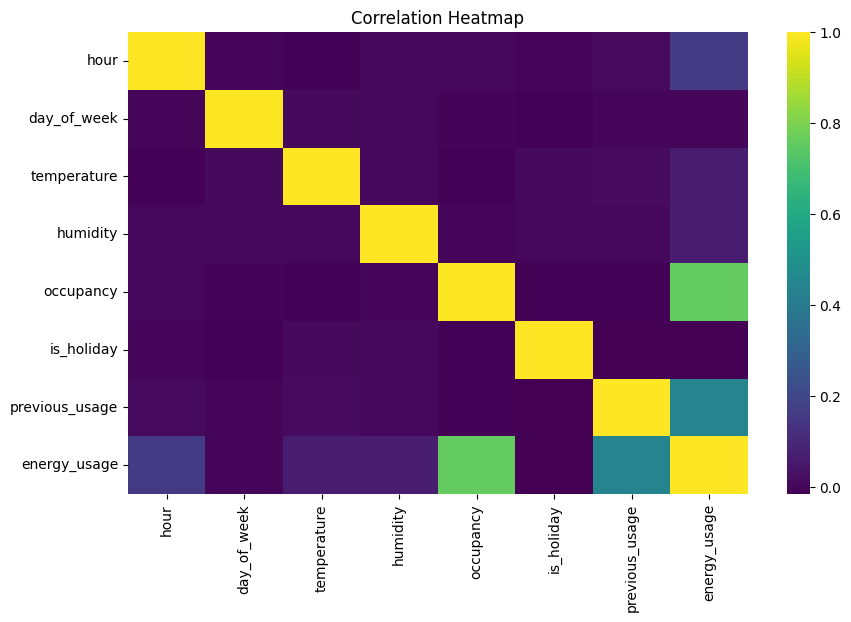

In [106]:
# Correlation Heatmap (numeric features only)
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


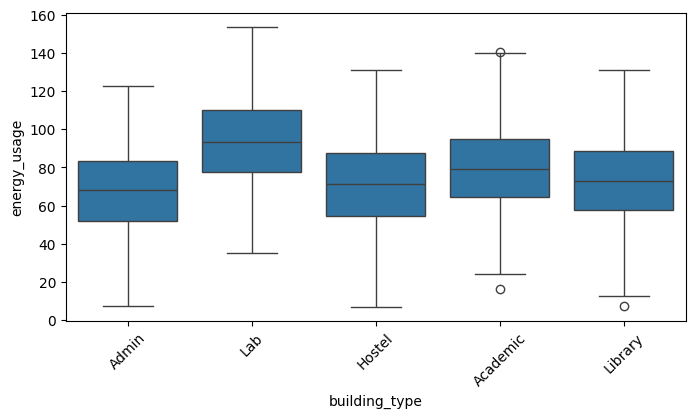

In [107]:
#Energy Usage vs Building Type
plt.figure(figsize=(8,4))
sns.boxplot(x="building_type", y="energy_usage", data=df)
plt.xticks(rotation=45)
plt.show()


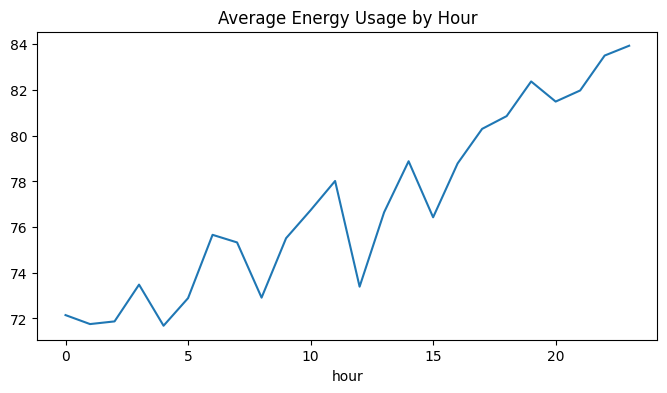

In [108]:
#Hourly Trend
df.groupby("hour")["energy_usage"].mean().plot(figsize=(8,4))
plt.title("Average Energy Usage by Hour")
plt.show()


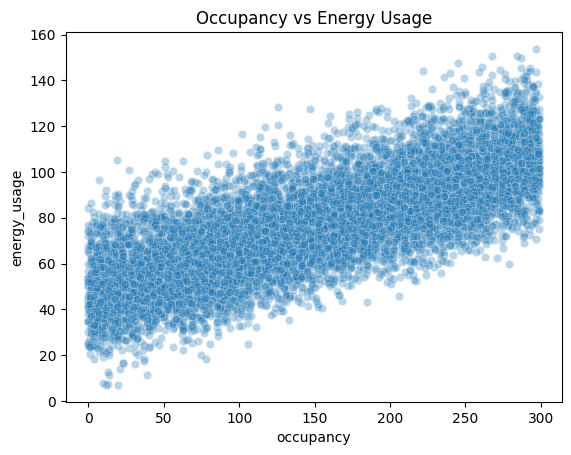

In [109]:
#Occupancy vs Energy Range
sns.scatterplot(x="occupancy", y="energy_usage", data=df, alpha=0.3)
plt.title("Occupancy vs Energy Usage")
plt.show()


In [110]:
#preprocessing
num_features = ["hour","day_of_week","temperature","humidity","occupancy","is_holiday","previous_usage"]
cat_features = ["building_type"]


In [111]:
#preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)


In [112]:
#train-test split
X = df.drop("energy_usage", axis=1)
y = df["energy_usage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestRegressor(
        n_estimators=80,
        max_depth=12,
        random_state=42
    ))
])


In [114]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['building_type']),
                                                 ('num', 'passthrough',
                                                  ['hour', 'day_of_week',
                                                   'temperature', 'humidity',
                                                   'occupancy', 'is_holiday',
                                                   'previous_usage'])])),
                ('rf',
                 RandomForestRegressor(max_depth=12, n_estimators=80,
                                       random_state=42))])

In [115]:
preds = model.predict(X_test)


In [116]:
print("MSE:", mean_squared_error(y_test, preds))
print("R2 Score:", r2_score(y_test, preds))


MSE: 107.78427976899172
R2 Score: 0.7837548493342187


In [117]:
#export for deployment
import joblib
joblib.dump(model, "energy_model.joblib",compress=3)


['energy_model.joblib']

In [118]:
#download
from google.colab import files
files.download("energy_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("energy_model.joblib")

st.title("Campus Energy Optimizer")

hour = st.slider("Hour", 0, 23, 12)
day = st.slider("Day of Week", 0, 6, 3)
temperature = st.number_input("Temperature (°C)", 10, 45, 28)
humidity = st.number_input("Humidity (%)", 20, 100, 55)
occupancy = st.number_input("Occupancy", 0, 300, 50)
building_type = st.selectbox("Building Type", ["Academic","Hostel","Library","Admin","Lab"])
is_holiday = st.selectbox("Holiday?", [0,1])
previous_usage = st.number_input("Previous Usage (kWh)", 0.0, 100.0, 30.0)

if st.button("Predict"):
    x = [[hour, day, temperature, humidity, occupancy, building_type, is_holiday, previous_usage]]
    prediction = model.predict(x)[0]
    st.success(f"Predicted Energy Usage: {prediction:.2f} kWh")


Overwriting app.py


In [120]:
!ls -l


total 7072
-rw-r--r-- 1 root root     825 Nov 23 06:50 app.py
-rw-r--r-- 1 root root  903052 Nov 23 06:27 campus_energy_dataset.csv
-rw-r--r-- 1 root root 6327556 Nov 23 06:50 energy_model.joblib
drwxr-xr-x 1 root root    4096 Nov 20 14:30 sample_data


In [121]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>